In [14]:
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_911 =pd.read_csv('911.csv')
data_911.head()
#data_911.columns
#data_911.index

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [18]:
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


In [23]:
data_911['zip'].value_counts().head(5)

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

In [25]:
data_911['twp'].value_counts().head(5)

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

In [30]:
data_911['title'].nunique()

133

In [41]:
data_911['reason']=data_911['title'].apply(lambda x: x.split(':')[0])
data_911['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

In [49]:
data_911['reason'].value_counts()


EMS        161441
Traffic    116065
Fire        48919
Name: reason, dtype: int64

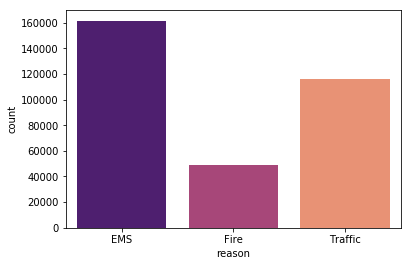

In [54]:
sns.countplot(data_911['reason'],palette='magma')

In [59]:
type(data_911['timeStamp'].iloc[0])

str

In [71]:
data_911['timeStamp']=pd.to_datetime(data_911['timeStamp'])
time = data_911['timeStamp'].iloc[0]
time.hour

17

In [76]:
data_911['Hour']=data_911['timeStamp'].apply(lambda x: x.hour)
data_911['timeStamp'].head(5)

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [82]:
data_911['Month']=data_911['timeStamp'].apply(lambda x: x.month)


In [83]:
data_911['Dayofweek']=data_911['timeStamp'].apply(lambda x: x.dayofweek)

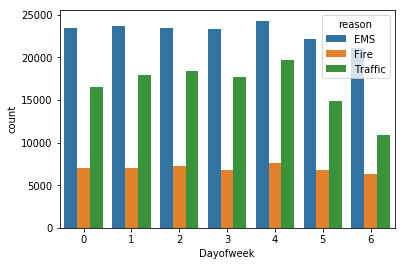

In [98]:
sns.countplot(data_911['Dayofweek'],hue=data_911['reason'])

In [99]:
data_911.groupby(by='Month').count().head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Dayofweek
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


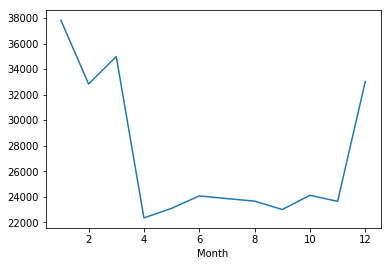

In [117]:
#sns.lmplot('Month')
d=data_911.groupby('Month').count()
#data_911['Month'].value_counts().plot(kind='line')
d['lat'].plot()

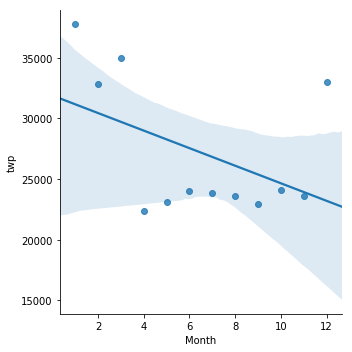

In [129]:
sns.lmplot(x='Month',y='twp',data=d.reset_index())

In [141]:
data_911['date']=data_911['timeStamp'].apply(lambda x: x.date())


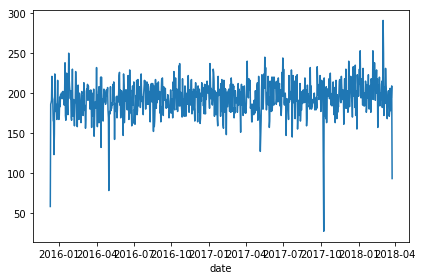

In [150]:
data_911[data_911['reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.tight_layout()

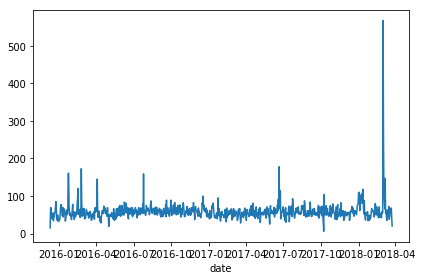

In [153]:
data_911[data_911['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()

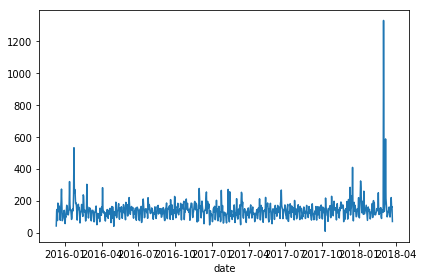

In [156]:
data_911[data_911['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
0,40.160939,40.163876,40.161841,40.171153,40.167396,40.174258,40.167262,40.158707,40.156741,40.157008,...,40.159208,40.158347,40.156664,40.157971,40.153346,40.156647,40.162608,40.163946,40.159365,40.160755
1,40.161950,40.161838,40.164698,40.163459,40.169132,40.168053,40.166405,40.161216,40.155270,40.157651,...,40.154275,40.157702,40.158688,40.156965,40.159664,40.160494,40.168099,40.163684,40.163653,40.163844
2,40.162850,40.163613,40.160292,40.163896,40.171335,40.163287,40.164618,40.161805,40.159347,40.156587,...,40.156275,40.159702,40.156040,40.154885,40.159483,40.155996,40.161459,40.161574,40.159691,40.161743
3,40.158879,40.164611,40.167222,40.165480,40.164440,40.166449,40.167396,40.155690,40.156885,40.152754,...,40.160686,40.155534,40.158266,40.160152,40.159599,40.158926,40.160946,40.160198,40.162376,40.163156
4,40.164150,40.160632,40.167542,40.161366,40.172601,40.169341,40.170703,40.161986,40.158431,40.157088,...,40.156593,40.154905,40.155673,40.157366,40.154634,40.154661,40.160716,40.157557,40.163891,40.160130
5,40.167712,40.159076,40.158126,40.156879,40.165679,40.166566,40.158033,40.161860,40.158407,40.163124,...,40.157735,40.159507,40.160139,40.157401,40.160481,40.161283,40.159414,40.164832,40.159244,40.159736
6,40.159922,40.159351,40.164408,40.161237,40.159731,40.164333,40.156820,40.165043,40.165238,40.167694,...,40.161578,40.162575,40.160650,40.160320,40.156715,40.159412,40.164875,40.161209,40.162893,40.165200


In [160]:
data_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015-12-10


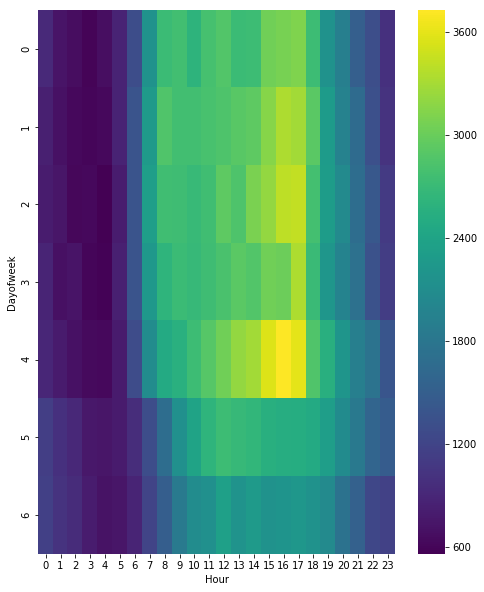

In [177]:
dayhour=data_911.groupby(by=['Dayofweek','Hour']).count()['reason'].unstack()
plt.figure(figsize=(8,10))
sns.heatmap(dayhour,cmap='viridis')


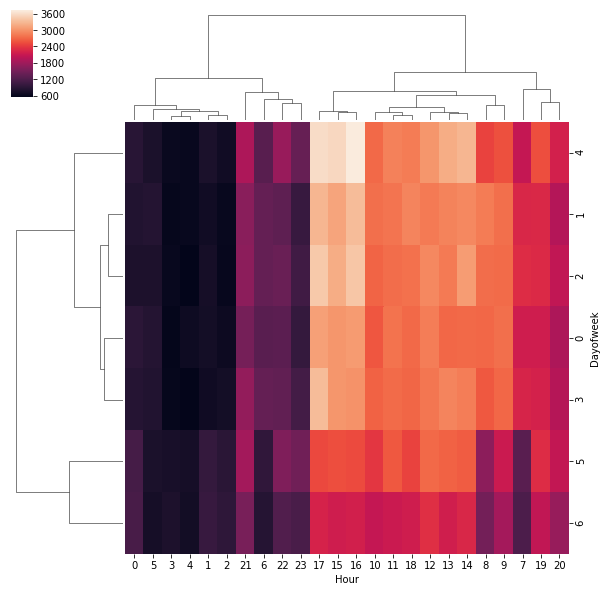

In [178]:
sns.clustermap(dayhour)